![image](https://c9ac71a8282e1fecd95e-f07dbcddcacf0d4c572ea7178ee6902d.ssl.cf2.rackcdn.com/blog/wp-content/uploads/2021/03/cell-phone-brand-loyalty-survey-2021.jpg)

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data set using the pandas read functipn
data=pd.read_csv('/kaggle/input/phone-prices/cleaned_all_phones.csv')
data.head()

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0
1,K20 plus,LG,Android 7.0,5.3,720x1280,2700,Li-Ion,2,2016-12-01,140.0,...,True,False,False,True,False,False,False,False,False,100.0
2,P8 Lite (2017),Huawei,Android 7.0,5.2,1080x1920,3000,Li-Ion,4,2017-01-01,147.0,...,True,False,False,True,False,False,False,False,False,420.0
3,Redmi Note 4,Xiaomi,Android 6.0,5.5,1080x1920,4100,Li-Po,4,2017-01-01,165.0,...,True,False,False,True,False,True,False,False,False,150.0
4,P10,Huawei,Android 7.0,5.1,1080x1920,3200,Li-Ion,4,2017-02-01,145.0,...,True,True,False,True,True,False,False,False,False,420.0


In [3]:
# Checking the data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   phone_name         1512 non-null   object 
 1   brand              1512 non-null   object 
 2   os                 1512 non-null   object 
 3   inches             1512 non-null   float64
 4   resolution         1512 non-null   object 
 5   battery            1512 non-null   int64  
 6   battery_type       1512 non-null   object 
 7   ram(GB)            1512 non-null   int64  
 8   announcement_date  1512 non-null   object 
 9   weight(g)          1512 non-null   float64
 10  storage(GB)        1512 non-null   int64  
 11  video_720p         1512 non-null   bool   
 12  video_1080p        1512 non-null   bool   
 13  video_4K           1512 non-null   bool   
 14  video_8K           1512 non-null   bool   
 15  video_30fps        1512 non-null   bool   
 16  video_60fps        1512 

In [4]:
# Checking the data shape
data.shape

(1512, 22)

In [5]:
#Stastical information about the data set
data.describe().style.background_gradient(cmap='Dark2_r')

,inches,battery,ram(GB),weight(g),storage(GB),price(USD)
count,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000,1512.000000
mean,6.422460,4389.798942,6.683862,187.636243,109.164683,337.847036
std,0.477043,784.607022,2.701433,26.200115,74.436484,266.740821
min,3.800000,1821.000000,1.000000,130.000000,1.000000,40.000000
25%,6.300000,4000.000000,4.000000,175.000000,64.000000,179.997500
50%,6.500000,4500.000000,8.000000,187.000000,128.000000,260.000000
75%,6.670000,5000.000000,8.000000,197.250000,128.000000,400.000000
max,10.400000,7250.000000,24.000000,500.000000,512.000000,2300.000000


In [6]:
#Checking the null values in the data
data.isna().sum()/len(data)*100

phone_name           0.0
brand                0.0
os                   0.0
inches               0.0
resolution           0.0
battery              0.0
battery_type         0.0
ram(GB)              0.0
announcement_date    0.0
weight(g)            0.0
storage(GB)          0.0
video_720p           0.0
video_1080p          0.0
video_4K             0.0
video_8K             0.0
video_30fps          0.0
video_60fps          0.0
video_120fps         0.0
video_240fps         0.0
video_480fps         0.0
video_960fps         0.0
price(USD)           0.0
dtype: float64

# Explore Data Analysis
##### Questions asked from the data
- Find the unique brands in the data.

- Task: Identify and list the unique brands present in the dataset.
- Find the most used brands in the data and visualize with bar plots.

- Task: Count the occurrences of each brand and create a bar plot to visualize the most popular brands.
- Visualize the bar plots to understand which battery capacity (mAh) sells the most and which Android version is in demand, etc.

- Task: Create bar plots to visualize sales or demand trends for different battery capacities (mAh) and Android versions.
- Create bar plots with boolean columns like video production for each brand.

- Task: Create separate bar plots for each brand to show the prevalence of video production capabilities.
- Find the top 10 mobile models announced in a single day.

- Task: Identify and list the top 10 mobile models that were announced on the same day.
- Check which RAM capacity and brand of mobiles sell the most using the groupby function.

- Task: Group the data by RAM capacity and brand, and analyze which combinations have the highest sales.

In [7]:
# Checking the unique company brand names in the data
data['brand'].unique()

array(['Huawei', 'LG', 'Xiaomi', 'Sony', 'Oppo', 'Samsung', 'Lenovo',
       'Apple', 'Google', 'Honor', 'Realme', 'OnePlus', 'Vivo'],
      dtype=object)

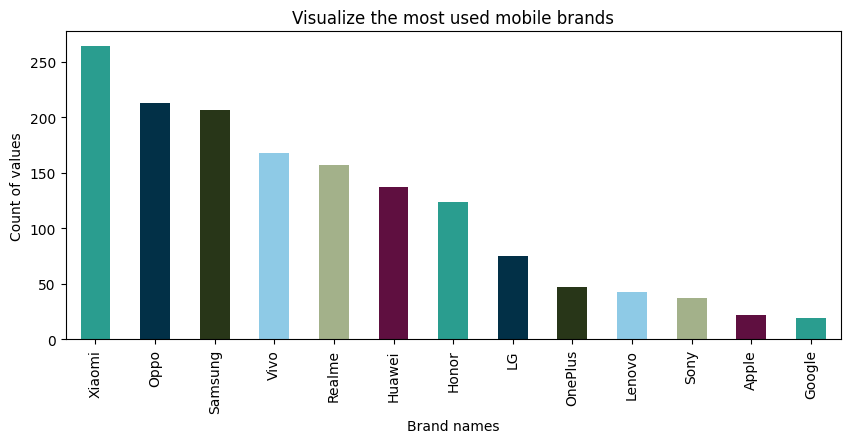

In [8]:
# Which brand companys most used
data['brand'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,4),color=['#2a9d8f','#023047','#283618','#8ecae6','#a3b18a','#5f0f40'])
plt.title("Visualize the most used mobile brands")
plt.xlabel("Brand names")
plt.ylabel("Count of values")
plt.show()

In [9]:
data.head(1)

,phone_name,brand,os,inches,resolution,battery,battery_type,ram(GB),announcement_date,weight(g),...,video_1080p,video_4K,video_8K,video_30fps,video_60fps,video_120fps,video_240fps,video_480fps,video_960fps,price(USD)
0,Y6II Compact,Huawei,Android 5.1,5.0,720x1280,2200,Li-Po,2,2016-09-01,140.0,...,False,False,False,True,False,False,False,False,False,120.0


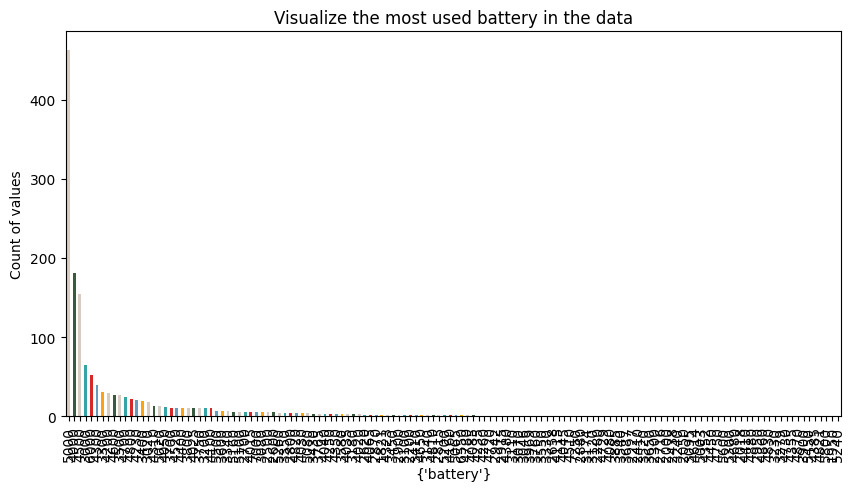

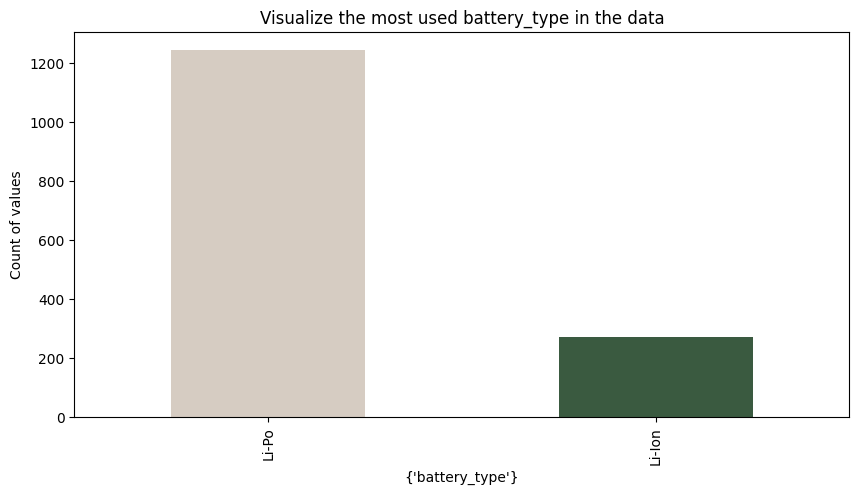

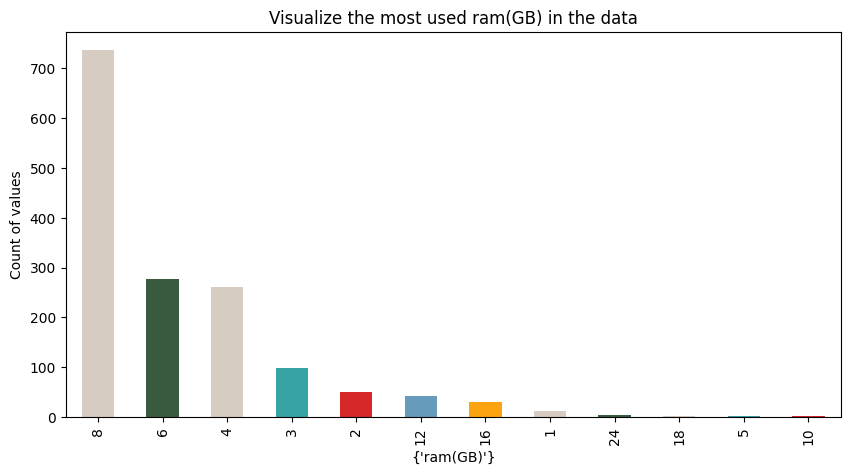

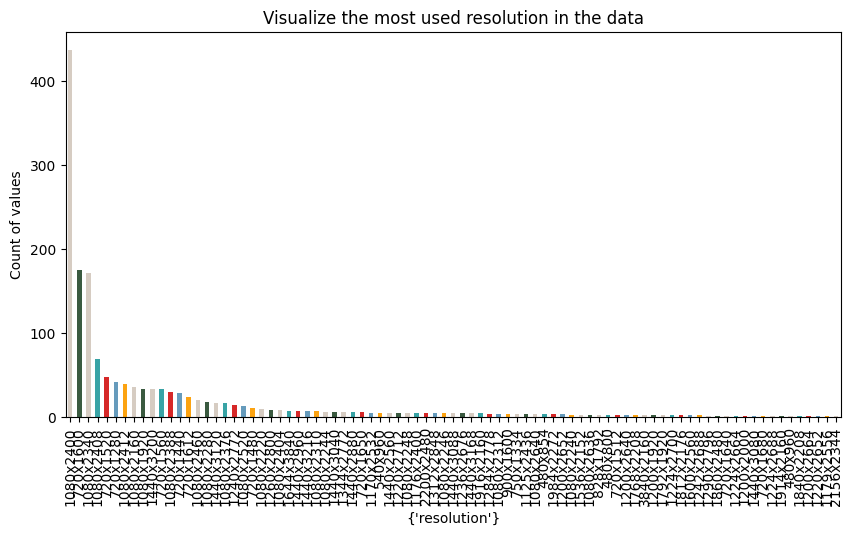

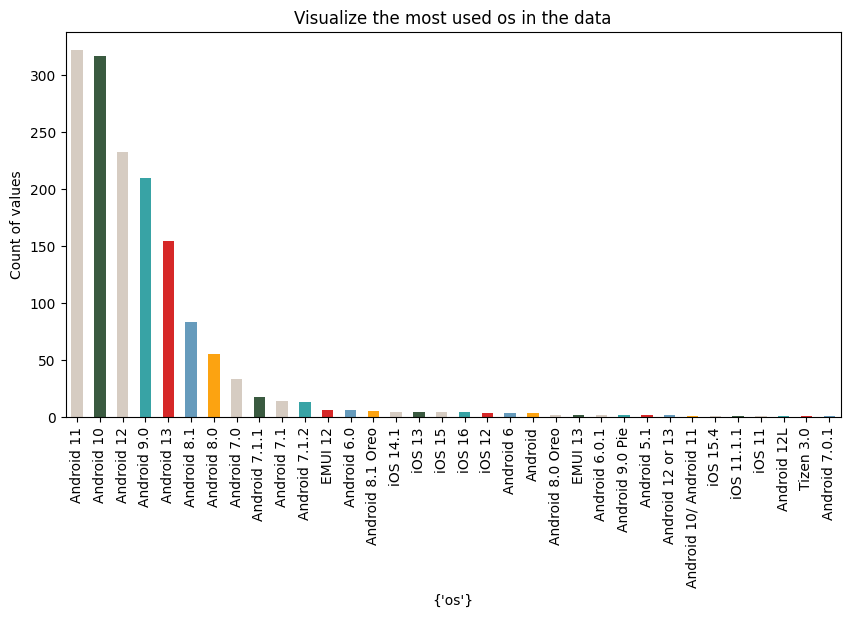

In [10]:
# To visualize the which batterys and batterys and rams most used we visualize the barplot
for i in data[['battery','battery_type','ram(GB)','resolution','os']]:
    data[i].value_counts().sort_values(ascending=False)\
    .plot(kind='bar',figsize=(10,5),color=['#d6ccc2','#3a5a40','#d6ccc2','#38a3a5','#d62828','#669bbc','#fca311'])
    plt.title(f"Visualize the most used {i} in the data")
    plt.xticks(rotation=90)
    plt.xlabel({i})
    plt.ylabel("Count of values")
    plt.show()
    

In [11]:
# price colums have dollar we convert the dollar into indian rupees
today_dollar_price=82.93
data['Ind_price']=data['price(USD)']*today_dollar_price
# Sum of the each brand prices with indian rupees concert into millions
sum_of_prices=data.groupby(['brand'])['Ind_price'].sum().sort_values(ascending=False)/1000000
print(f'{(sum_of_prices)}')

brand
Xiaomi     6.704981
Oppo       6.029319
Samsung    5.941026
Vivo       4.709130
Huawei     4.589029
Honor      3.684698
Realme     3.156151
LG         1.642014
OnePlus    1.640978
Sony       1.444554
Apple      1.240701
Lenovo     0.874082
Google     0.706030
Name: Ind_price, dtype: float64


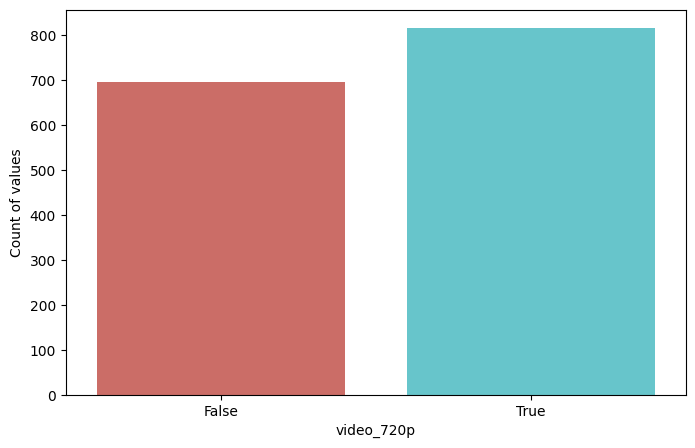

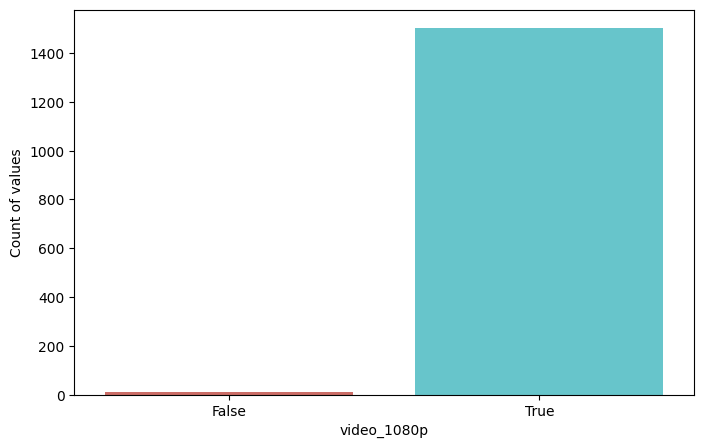

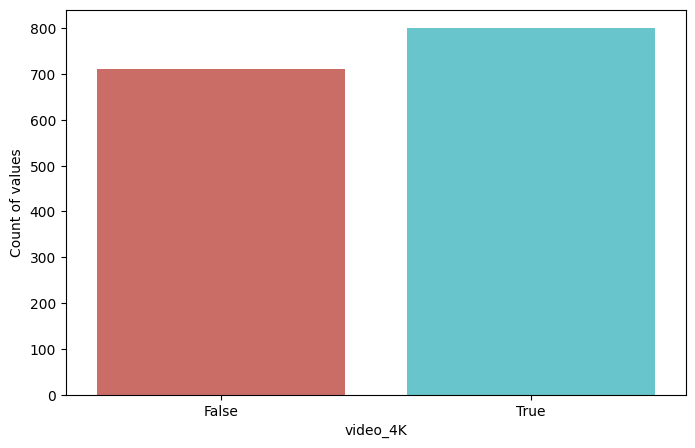

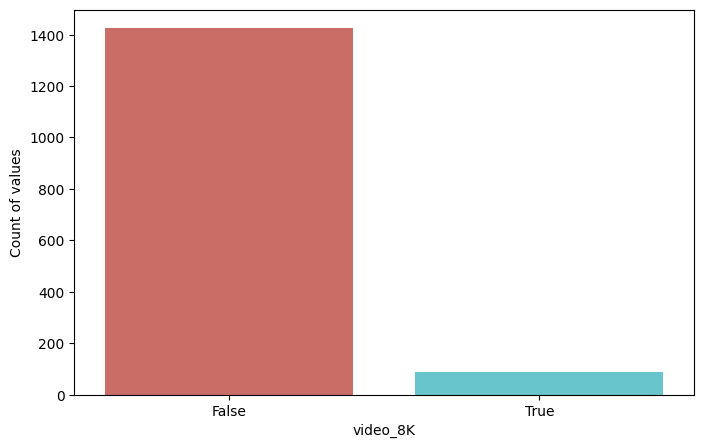

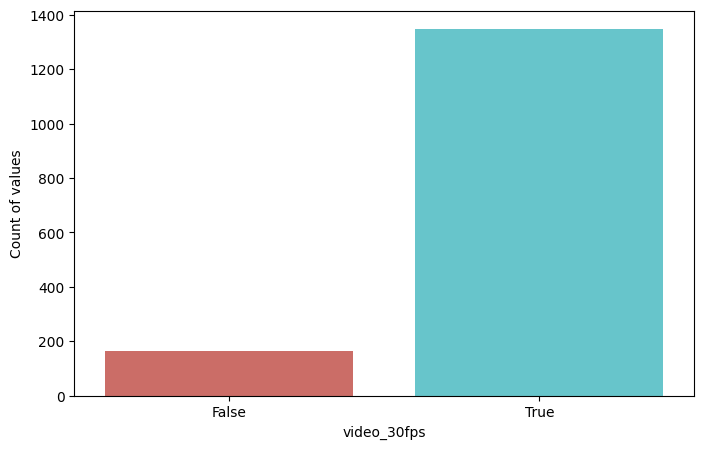

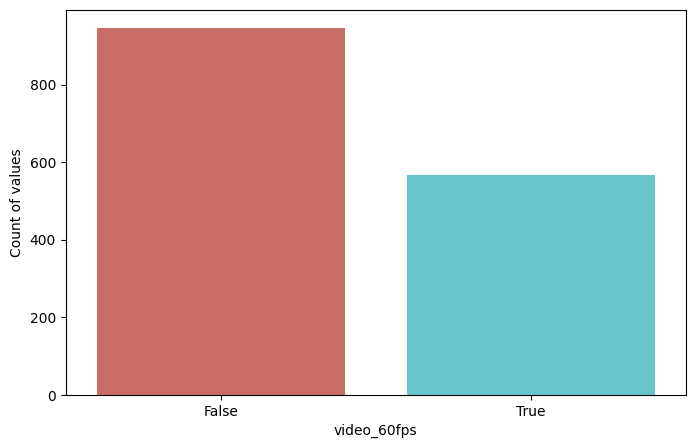

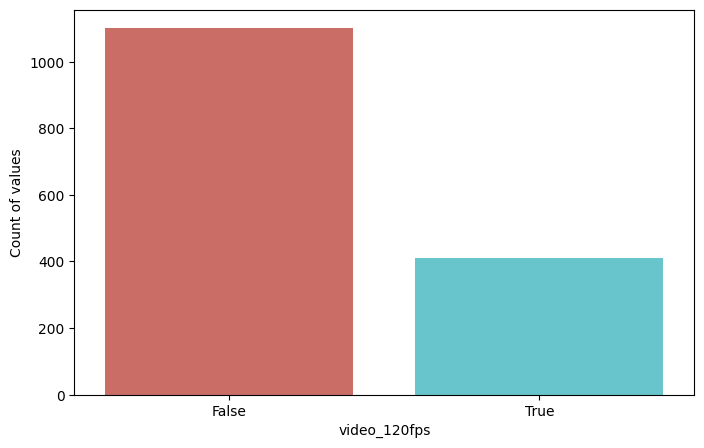

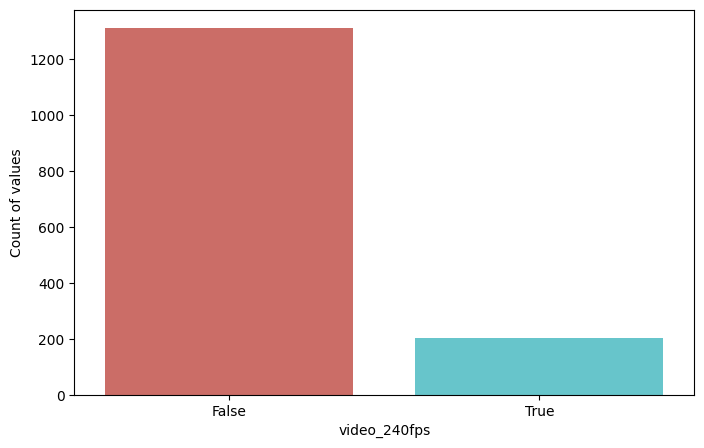

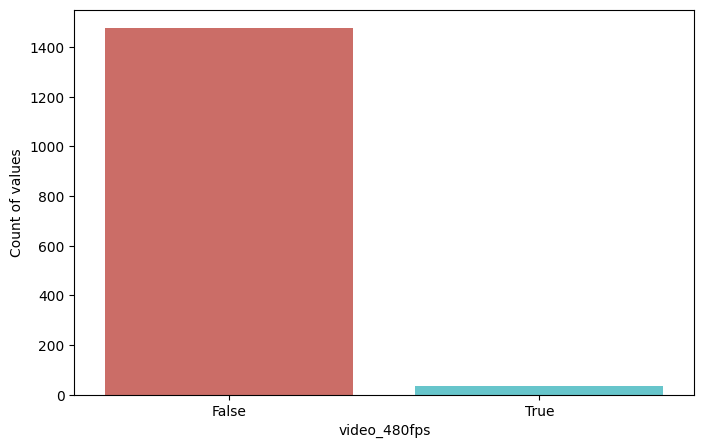

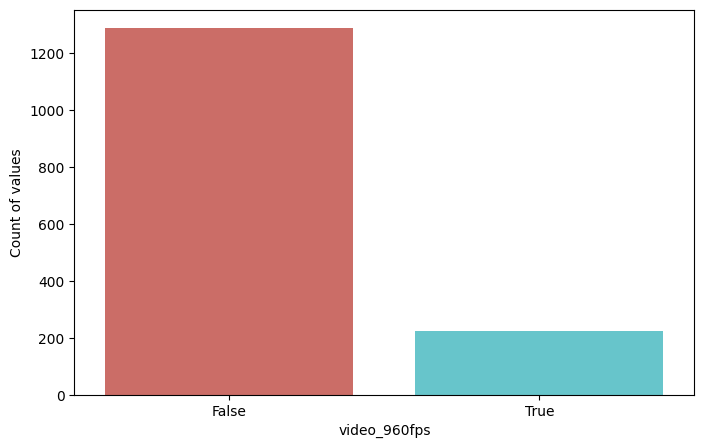

In [12]:
# Select the categorical columns in the data 
for i in data.select_dtypes(include='bool'):
    values=data[i].value_counts()
    plt.figure(figsize=(8,5))
    sns.barplot(data=data,x=values.index,y=values.values,palette='hls')
    plt.xlabel(i)
    plt.ylabel("Count of values")
    plt.show()

In [13]:
# we visualize highest models brand moblie recevied at the same time
year_brand=pd.DataFrame(data.groupby(['announcement_date'],as_index=False)['brand'].value_counts().sort_values(by='count',ascending=False))
year_brand.head(10).style.background_gradient(cmap='gist_rainbow_r')

,announcement_date,brand,count
276,2020-02-11,Samsung,7
491,2021-03-04,Xiaomi,6
77,2018-05-01,Samsung,6
173,2019-04-01,Oppo,6
871,2022-11-23,Honor,5
389,2020-08-05,Samsung,5
444,2020-10-22,Huawei,5
63,2018-03-01,Huawei,5
862,2022-10-27,Xiaomi,5
16,2017-05-01,Huawei,5


In [14]:
# top 20 mobile brand with ram wise
brand_ram=pd.DataFrame(data.groupby(['brand'])['ram(GB)'].value_counts().sort_values(ascending=False))
brand_ram.head(30).unstack().style.background_gradient(cmap='Pastel2')

In [15]:
# To understand how much stograge pepole mostly buy 
storage_brand=pd.DataFrame(data.groupby(['brand'])['storage(GB)'].value_counts().sort_values(ascending=False))
storage_brand.unstack().style.background_gradient(cmap='GnBu')

## Observations we recevied from the above data 
- In the bar charts, we observed that Xiaomi, Oppo, and Samsung are the leading mobile selling companies.
- In the grouped bar charts, mobiles with 5000mAh battery capacity, Android 11 version, and Li-Po batteries are the most demanded within their respective brands.
- In the video section, most brands offer mobiles capable of recording HD, FHD, 2K, and 4K videos.
- In the dataset, on February 11, 2020, Samsung launched 7 variants, and on March 4, 2021, Xiaomi released 6 variants.
- Most mobiles are sold with 8GB of RAM, and Xiaomi dominates the market, with Oppo in the second place.

In [16]:
data.columns

Index(['phone_name', 'brand', 'os', 'inches', 'resolution', 'battery',
       'battery_type', 'ram(GB)', 'announcement_date', 'weight(g)',
       'storage(GB)', 'video_720p', 'video_1080p', 'video_4K', 'video_8K',
       'video_30fps', 'video_60fps', 'video_120fps', 'video_240fps',
       'video_480fps', 'video_960fps', 'price(USD)', 'Ind_price'],
      dtype='object')

# Machine Learning Modeling

In [17]:
# Import all the required libraries for machine learning modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [18]:
# Divided the data into independent and dependent variable
X=data[['phone_name', 'brand', 'os', 'battery',
       'battery_type', 'ram(GB)','storage(GB)']]
y=data['Ind_price']

In [19]:
#Convert the categorical columsn
for i in X.select_dtypes(include='object'):
    label=LabelEncoder()
    X[i]=label.fit_transform(X[i])
X.head()

,phone_name,brand,os,battery,battery_type,ram(GB),storage(GB)
0,1238,3,8,2200,1,2,16
1,582,4,12,2700,0,2,16
2,788,3,12,3000,0,4,16
3,1017,12,10,4100,1,4,32
4,769,3,12,3200,0,4,32


In [20]:
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[ 1.14065461, -1.32613106, -0.03193824, ...,  0.4662524 ,
        -1.73441723, -1.25201381],
       [-0.37146952, -1.03662627,  0.47372264, ..., -2.14476106,
        -1.73441723, -1.25201381],
       [ 0.10337434, -1.32613106,  0.47372264, ..., -2.14476106,
        -0.9938245 , -1.25201381],
       ...,
       [-0.89471979,  0.12139288, -0.15835346, ...,  0.4662524 ,
         3.44973187,  1.97327829],
       [-0.89241472,  0.12139288, -0.15835346, ...,  0.4662524 ,
         6.41210279, -1.45359456],
       [ 1.7261417 ,  0.98990724, -0.15835346, ...,  0.4662524 ,
         0.48736096,  0.2531225 ]])

In [21]:
# Split the data infor train and test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=20,random_state=120)
# Checking the X_train and y_train shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1492, 7)
(1492,)
(20, 7)
(20,)


In [22]:
# Create function for machine learnign modeling
import math
def regressor_model(model,X_train,X_test,y_train,y_test):
    print(f'The {model}')
    #fit the model with train data
    model.fit(X_train,y_train)
    # model prediction
    y_pred=model.predict(X_test)
    # Mean squared erro
    print('Mean Squared Error',format(mean_squared_error(y_test,y_pred)))
    # R2_score
    r2_sqr=r2_score(y_test,y_test)
    print('r2_score',r2_sqr)
    rmse=math.sqrt(mean_squared_error(y_test,y_pred))
    print('Root mean squared_Error',rmse)
    print("*"*20)

In [23]:
# difine the all model with dictionary format
models={
    'Linear':LinearRegression(),
    'Random':RandomForestRegressor(),
    'tree':DecisionTreeRegressor(),
    'knn':KNeighborsRegressor(),
    'XGB':XGBRegressor()
}

In [24]:
for i in range(len(models)):
    model=list(models.values())[i]
    values=list(models.keys())[i]
    regressor_model(model,X_train,X_test,y_train,y_test)
    


The LinearRegression()
Mean Squared Error 1608981525.593329
r2_score 1.0
Root mean squared_Error 40112.111956282344
********************
The RandomForestRegressor()
Mean Squared Error 1550261575.6132598
r2_score 1.0
Root mean squared_Error 39373.36124352682
********************
The DecisionTreeRegressor()
Mean Squared Error 1562295332.1155703
r2_score 1.0
Root mean squared_Error 39525.88180060719
********************
The KNeighborsRegressor()
Mean Squared Error 1421086462.895892
r2_score 1.0
Root mean squared_Error 37697.300472260504
********************
The XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_ca